# AML - Exercise sheet 10
## Exercise 2

## (a)

In [1]:
from AdaBoost import AdaBoost
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

import matplotlib.pyplot as plt

In [2]:
X, y = make_moons(n_samples=int(1e4))
y = np.where(y == 1, 1, -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
T = 10

clf = AdaBoost(base_learner=DecisionTreeClassifier(max_depth=1), n_estimators=T)
clf.fit(X_train, y_train)

[(0.812105282883894, DecisionTreeClassifier(max_depth=1)),
 (1.0889609125408444, DecisionTreeClassifier(max_depth=1)),
 (0.7162462402967673, DecisionTreeClassifier(max_depth=1)),
 (0.728055509819841, DecisionTreeClassifier(max_depth=1)),
 (0.48828665800829685, DecisionTreeClassifier(max_depth=1)),
 (0.5325207422221643, DecisionTreeClassifier(max_depth=1)),
 (0.5375472267983491, DecisionTreeClassifier(max_depth=1)),
 (0.5568820034528221, DecisionTreeClassifier(max_depth=1)),
 (0.49164695920073104, DecisionTreeClassifier(max_depth=1)),
 (0.4850185498175146, DecisionTreeClassifier(max_depth=1))]

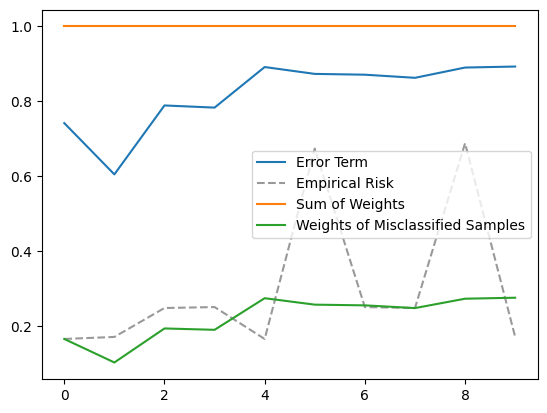

In [4]:
plt.plot(clf.error_term, label="Error Term")
plt.plot(clf.empirical_risk, "--k", label="Empirical Risk", alpha=0.4)
plt.plot(clf.sum_weights, label="Sum of Weights")
plt.plot(clf.weights_misclassified, label="Weights of Misclassified Samples")

plt.legend()
plt.show()

## (b)

In [7]:
T = 100

clf = AdaBoost(base_learner=DecisionTreeClassifier(max_depth=1), n_estimators=T)
clf.fit(X_train, y_train)

[(0.812105282883894, DecisionTreeClassifier(max_depth=1)),
 (1.0889609125408444, DecisionTreeClassifier(max_depth=1)),
 (0.7162462402967673, DecisionTreeClassifier(max_depth=1)),
 (0.728055509819841, DecisionTreeClassifier(max_depth=1)),
 (0.48828665800829685, DecisionTreeClassifier(max_depth=1)),
 (0.5325207422221643, DecisionTreeClassifier(max_depth=1)),
 (0.5375472267983491, DecisionTreeClassifier(max_depth=1)),
 (0.5568820034528221, DecisionTreeClassifier(max_depth=1)),
 (0.49164695920073104, DecisionTreeClassifier(max_depth=1)),
 (0.4850185498175146, DecisionTreeClassifier(max_depth=1)),
 (0.5420301865402409, DecisionTreeClassifier(max_depth=1)),
 (0.4757401821540941, DecisionTreeClassifier(max_depth=1)),
 (0.4521893632476531, DecisionTreeClassifier(max_depth=1)),
 (0.5278892197984977, DecisionTreeClassifier(max_depth=1)),
 (0.5106956595005612, DecisionTreeClassifier(max_depth=1)),
 (0.448382622769832, DecisionTreeClassifier(max_depth=1)),
 (0.44410876509016567, DecisionTreeClassi

In [19]:
empirical_risk_t = []

for t in np.arange(start=1, stop=T+1, step=1):
	pred = np.zeros(X.shape[0])
	for a, h in clf.estimators[:t]:
	    pred += a * h.predict(X)

	y_hat = np.sign(pred)
	empirical_risk_t.append(np.mean(y_hat != y))

In [20]:
bound = np.exp(-2 + np.sum((0.5 - np.array(clf.empirical_risk)) ** 2))
print(f"{bound=:.3f}")

bound=275.598


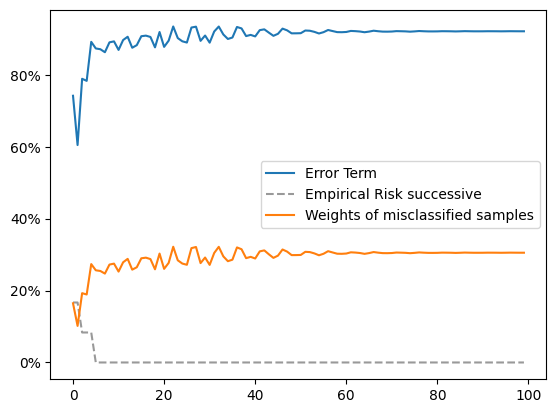

In [23]:
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    # Convert the y value to a percentage string.
    s = f"{100 * y:.0f}%"
    return s

plt.plot(clf.error_term, label="Error Term")
plt.plot(empirical_risk_t, "--k", label="Empirical Risk successive", alpha=0.4)
plt.plot(clf.weights_misclassified, label="Weights of misclassified samples")

# Set the formatter for the y-axis.
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.legend()
plt.show()